### This notebook implements the low pass filter logic for smoothing of the discrete signals.

Date created = 26 March 2019

Date Finished = 26 March 2019

Conclusion = Here, Outlier Detection and Imputation was done by the use of **Butterworth Low Pass Filter** and **RC Filter**. Both these approaches failed to generate good results.

In [2]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.signal as sig
from scipy.signal import butter, lfilter, freqz
import random
import time

In [3]:
# setting up visualization and pandas parameters

os.chdir("/home/CWSHPMU2316/Desktop/EVRangePrediction/data/raw")
pd.set_option("display.max_columns", 200)
plt.rcParams["figure.figsize"] = (10, 10)
sns.set_style("darkgrid")

In [4]:
# selecting a file at random

### vehicleList ###
# list of all the vehicles used in analysis
# this list will help in randomly selecting the files to be used in analysis

vehicleList = [352891066262326, 352891066262722, 352891066262995, 352891066263282, 352891066264694, 352891066265451, \
               358272088698868, 358272088699007, 358272088699072, 358272088701548, 358272088709954, 358272088712370, \
               358272088715043, 358272088715191, 358272088716215, 358272088718575, 358272088730844]



def randomDate(start, end, format, prop):
    """
    generates a date within the window of start and end
    """
    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))
    ptime = stime + prop * (etime - stime)
    return time.strftime(format, time.localtime(ptime))


def randomDateGenerator(start, end, prop):
    """
    calls the function randomDate() and defines the format of the date
    """
    return randomDate(start, end, '%Y-%m-%d', prop)

def csv():
    """
    returns a csv file name.
    """
    return str(random.choice(vehicleList))+"_"+randomDateGenerator("2018-11-01", "2019-01-27", random.random()) + "_cb.csv"

In [5]:
filename = csv() # getting the file by above used logic
print("file = {}".format(filename))
data = pd.read_csv("358272088715191_2019-01-16_cb.csv")

data.head()

file = 358272088699007_2018-12-17_cb.csv


,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
0,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.0,NaN,1547605702400,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,0,27,13.9,0,0.0,46.225,52.9,0,-65532,0,2572,13.0,0,13.7,50.0,55,0,0,0,0,0,137,0,-820,654,23,NaN
1,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.0,NaN,1547605702500,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,0,27,13.9,0,0.0,46.225,52.9,0,-65532,0,2572,13.0,0,13.7,50.0,55,0,0,0,0,0,137,0,-820,654,23,NaN
2,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.0,NaN,1547605702600,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,0,27,13.9,0,0.0,46.225,52.9,0,-65532,0,2572,13.0,0,13.7,50.0,55,0,0,0,0,0,137,0,-820,654,23,NaN
3,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.0,NaN,1547605702700,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,

In [6]:
# finding out the index across the data, wherever new trip starts
# Logic used - whenever the value of EVIGC changes, new trip starts.

new_trip = []
for i in range(1, len(data)):
    if data.EVIGC[i] - data.EVIGC[i-1] >= 1:
        new_trip.append(data.index[i])

In [7]:
# printing the new trip indices
new_trip

[21000, 63600]

In [8]:
# cross-checking the logic
data[41398:41402]

,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
41398,DEFREG:358272088715191,Trip not started,NaN,77.04986,28.48182,191.97,NaN,1547645638200,77.049833,28.481825,191.52437,762680892,3,50.0,0.7,16,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,247,2.3281,71,11,0,1,1,28.7,1,13.9,0,47.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,4.025,4.025,89.2,89.2,89.0,89.0,100,19.0,19.0,19.0,18.0,18.0,18.0,4.25,5.25,3.5,266.00,266.25,266.0,1790,1850,100,100,28,47,0,31,36,0,24,26,0,27,80,22,4.00,33.5,149,179.8,-180.2,266,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,30,26,0,13,13.9,0,0.375,13.675,2.3,0,-65532,0,2597,16.0,0,8.9,50.0,55,0,0,0,0,0,138,-57,-763,718,104,NaN
41399,DEFREG:358272088715191,Trip not started,NaN,77.04986,28.48182,191.97,NaN,1547645638300,77.049833,28.481825,191.52437,762680892,3,50.0,0.7,16,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,247,2.3281,71,11,0,1,1,28.7,1,13.9,0,47.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,4.025,4.025,89.2,89.2,89.0,89.0,100,19.0,19.0,19.0,18.0,18.0,18.0,4.25,5.25,3.5,266.00,266.25,266.0,1790,1850,100,100,28,47,0,31,36,0,24,26,0,27,80,22,4.00,33.5,149,179.8,-180.2,266,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,30,26,0,13,13.9,0,0.375,13.675,2.3,0,-65532,0,2597,16.0,0,8.9,50.0,55,0,0,0,0,0,138,-57,-763,718,104,NaN
41400,DEFREG:358272088715191,Trip not started,NaN,77.04986,28.48182,191.97,NaN,1547645638400,77.049833,28.481825,191.52437,762680892,3,50.0,0.7,16,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,247,1.1016,113,11,0,0,1,5.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,4.030,4.025,89.2,89.2,89.0,89.0,100,19.0,19.0,19.0,18.0,18.0,18.0,2.00,-496.00,-343.0,266.25,178.00,16195.0,1820,1820,100,100,25,-50,-6,31,115,202,24,-50,16,27,128,212,0.25,2.8,40,180.0,-180.0,266,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,30,26,0,30,13.9,0,-0.375,14.500,0.5,0,-65532,0,2597,16.5,0,8.7,50.0,55,0,0,0,0,0,140,-65,-828,656,68,NaN
41401,DEFREG:358272088715191,Trip not started,NaN,77.04986,28.48182,191.97,NaN,1547645638500,77.049833,28.481825,191.52437,762680892,3,50.0,0.7,16,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,247,1.1016,113,11,0,0,1,5.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,4.030,4.025,89.2,89.2,89.0,89.0,100,19.0,19.0,19.0,18.0,18.0,18.0,2.00,-496.00,-343.0,266.25,178.00,16195.0,1820,1820,100,100,

In [9]:
# creating the new data set t_data. This data contains value for single trip only.
t_data = data[:41400]

In [10]:
t_data.tail()

,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
41395,DEFREG:358272088715191,Trip not started,NaN,77.04986,28.48182,191.97,NaN,1547645637900,77.049833,28.481825,191.52437,762680892,3,50.0,0.7,16,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,247,2.3281,71,11,0,1,1,28.7,1,13.9,0,47.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,4.025,4.025,89.2,89.2,89.0,89.0,100,19.0,19.0,19.0,18.0,18.0,18.0,4.25,5.25,3.5,266.0,266.25,266.0,1790,1850,100,100,28,47,0,31,36,0,24,26,0,27,80,22,4.0,33.5,149,179.8,-180.2,266,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,30,26,0,13,13.9,0,0.375,13.675,2.3,0,-65532,0,2597,16.0,0,8.9,50.0,55,0,0,0,0,0,138,-57,-763,718,104,NaN
41396,DEFREG:358272088715191,Trip not started,NaN,77.04986,28.48182,191.97,NaN,1547645638000,77.049833,28.481825,191.52437,762680892,3,50.0,0.7,16,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,247,2.3281,71,11,0,1,1,28.7,1,13.9,0,47.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,4.025,4.025,89.2,89.2,89.0,89.0,100,19.0,19.0,19.0,18.0,18.0,18.0,4.25,5.25,3.5,266.0,266.25,266.0,1790,1850,100,100,28,47,0,31,36,0,24,26,0,27,80,22,4.0,33.5,149,179.8,-180.2,266,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,30,26,0,13,13.9,0,0.375,13.675,2.3,0,-65532,0,2597,16.0,0,8.9,50.0,55,0,0,0,0,0,138,-57,-763,718,104,NaN
41397,DEFREG:358272088715191,Trip not started,NaN,77.04986,28.48182,191.97,NaN,1547645638100,77.049833,28.481825,191.52437,762680892,3,50.0,0.7,16,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,247,2.3281,71,11,0,1,1,28.7,1,13.9,0,47.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,4.025,4.025,89.2,89.2,89.0,89.0,100,19.0,19.0,19.0,18.0,18.0,18.0,4.25,5.25,3.5,266.0,266.25,266.0,1790,1850,100,100,28,47,0,31,36,0,24,26,0,27,80,22,4.0,33.5,149,179.8,-180.2,266,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,30,26,0,13,13.9,0,0.375,13.675,2.3,0,-65532,0,2597,16.0,0,8.9,50.0,55,0,0,0,0,0,138,-57,-763,718,104,NaN
41398,DEFREG:358272088715191,Trip not started,NaN,77.04986,28.48182,191.97,NaN,1547645638200,77.049833,28.481825,191.52437,762680892,3,50.0,0.7,16,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,247,2.3281,71,11,0,1,1,28.7,1,13.9,0,47.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,4.025,4.025,89.2,89.2,89.0,89.0,100,19.0,19.0,19.0,18.0,18.0,18.0,4.25,5.25,3.5,266.0,266.25,266.0,1790,1850,100,100,28,47,0,31,36,0,24,26,0,27,80,

In [11]:
# making a new column called elapsed column
# logic = current timestamp - initial timestamp (timestamp from where trip started) 

elapsed_time = []
for k in range(0, len(t_data)):
    temp = t_data.tm[k] - t_data.tm[0]
    elapsed_time.append(temp)
    
elapsed_tm = pd.DataFrame({
    "elapsed_tm": elapsed_time
})

t_data = pd.concat((t_data, elapsed_tm), axis = 1)

In [12]:
t_data.head()

,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164,elapsed_tm
0,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.0,NaN,1547605702400,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,0,27,13.9,0,0.0,46.225,52.9,0,-65532,0,2572,13.0,0,13.7,50.0,55,0,0,0,0,0,137,0,-820,654,23,NaN,0
1,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.0,NaN,1547605702500,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,0,27,13.9,0,0.0,46.225,52.9,0,-65532,0,2572,13.0,0,13.7,50.0,55,0,0,0,0,0,137,0,-820,654,23,NaN,100
2,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.0,NaN,1547605702600,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,0,27,13.9,0,0.0,46.225,52.9,0,-65532,0,2572,13.0,0,13.7,50.0,55,0,0,0,0,0,137,0,-820,654,23,NaN,200
3,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.0,NaN,1547605702700,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,21

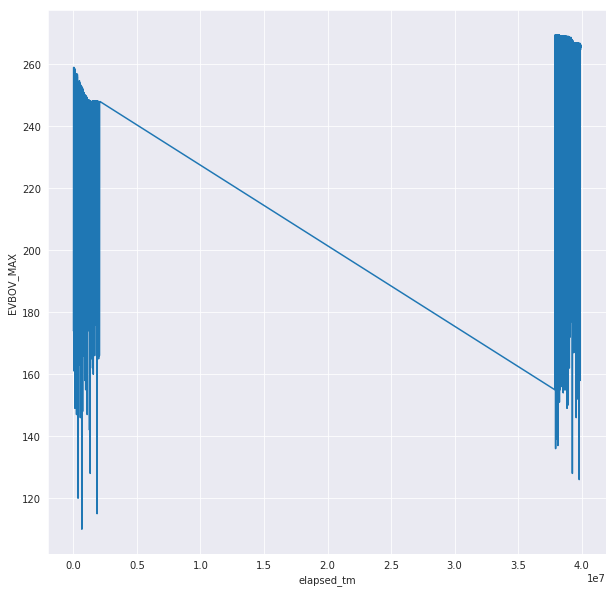

In [13]:
# plotting EVBOV_MAX, one of the 12 values, where outliers are having a huge effect
sns.lineplot(y = "EVBOV_MAX", x = "elapsed_tm", data = t_data)
plt.show()

## Butterflow Low pass filter attempt - 01

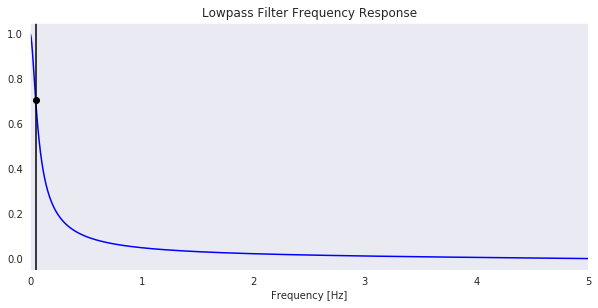

In [14]:
def butter_lowpass(cutoff, fs, order=5):
    """
    butterworth low pass filter logic
    nyq - nyquest frequency
    """
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog = False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    """
    calling the function butter_lowpass
    """
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Parameters of Butterworth filter
order = 1       #order of butterworth filter
fs = 10         # sample rate, Hz
cutoff = 0.05   # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=t_data.elapsed_tm.max())
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = t_data.elapsed_tm.max()            # seconds
n = int(T * fs)                        # total number of samples
t = np.linspace(0, T, len(t_data), endpoint=False)

In [15]:
d = t_data["EVBOV_MAX"].values

In [16]:
y = butter_lowpass_filter(d, cutoff, fs, order)

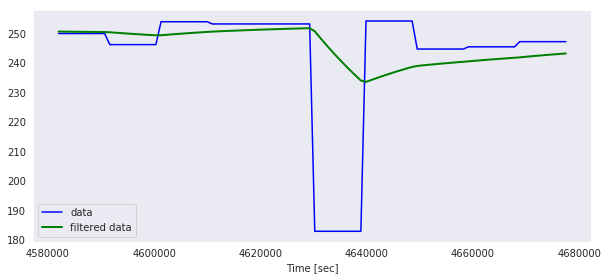

In [17]:
plt.subplot(2, 1, 2)
plt.plot(t[4750:4850], d[4750:4850], 'b-', label='data')
plt.plot(t[4750:4850], y[4750:4850], 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [18]:
t_data[t_data["EVBOV_MAX"] < 170]

,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164,elapsed_tm
600,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.00,NaN,1547605762400,76.951081,28.390039,87.786030,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,22.4766,87,11,0,0,1,60.0,1,13.9,0,66.0,0,0,0,38.4314,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.770,3.730,78.1,77.9,77.7,77.5,100,15.5,15.5,15.5,15.0,15.0,15.0,39.75,-457.0,-358.0,256.50,161.0,16172.0,1830,1800,100,100,23,-50,14,18,158,203,16,205,187,15,180,213,41.25,60.4,1473,179.4,-180.6,256,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,15,16,0,10,13.9,0,1.0000,-0.350,0.0,0,-65532,0,2572,11.0,0,13.7,50.0,55,0,0,0,0,0,137,-73,-836,688,52,NaN,60000
601,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.00,NaN,1547605762500,76.951081,28.390039,87.786030,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,22.4766,87,11,0,0,1,60.0,1,13.9,0,66.0,0,0,0,38.4314,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.770,3.730,78.1,77.9,77.7,77.5,100,15.5,15.5,15.5,15.0,15.0,15.0,39.75,-457.0,-358.0,256.50,161.0,16172.0,1830,1800,100,100,23,-50,14,18,158,203,16,205,187,15,180,213,41.25,60.4,1473,179.4,-180.6,256,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,15,16,0,10,13.9,0,1.0000,-0.350,0.0,0,-65532,0,2572,11.0,0,13.7,50.0,55,0,0,0,0,0,137,-73,-836,688,52,NaN,60100
602,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.00,NaN,1547605762600,76.951081,28.390039,87.786030,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,22.4766,87,11,0,0,1,60.0,1,13.9,0,66.0,0,0,0,38.4314,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.770,3.730,78.1,77.9,77.7,77.5,100,15.5,15.5,15.5,15.0,15.0,15.0,39.75,-457.0,-358.0,256.50,161.0,16172.0,1830,1800,100,100,23,-50,14,18,158,203,16,205,187,15,180,213,41.25,60.4,1473,179.4,-180.6,256,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,15,16,0,10,13.9,0,1.0000,-0.350,0.0,0,-65532,0,2572,11.0,0,13.7,50.0,55,0,0,0,0,0,137,-73,-836,688,52,NaN,60200
603,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.00,NaN,1547605762700,76.951081,28.390039,87.786030,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,22.4766,87,11,0,0,1,60.0,1,13.9,0,66.0,0,0,0,38.4314,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.770,3.730,78.1,77.9,77.7,77.5,100,15.5

## RC Filter Logic

In [19]:
def rc_logic(arr):
    """
    This function implements the RC Filter
    """
    RC = 5
    T = 0.1
    alpha = (2*RC)/T 
    
    rc_list = []
    
    x0 = 0      # x(n-1) value
    y0 = 0      # y(n-1) value
    for i in range(0, len(arr)):
        xi = arr[i]
        yi = ((xi + x0) - ((1-alpha)*y0))/(1+alpha)
        rc_list.append(yi)
        x0 = xi
        y0 = yi
    
    return rc_list

In [20]:
# passing an numpy array of EVBOV_MAX
evbov_arr = rc_logic(t_data["EVBOV_MAX"].values)

In [21]:
# Creating a dataframe of original and resultant (RC Filter) values
df = pd.DataFrame({
    "EVBOV_Max": t_data["EVBOV_MAX"],
    "RC_Logic": evbov_arr
})

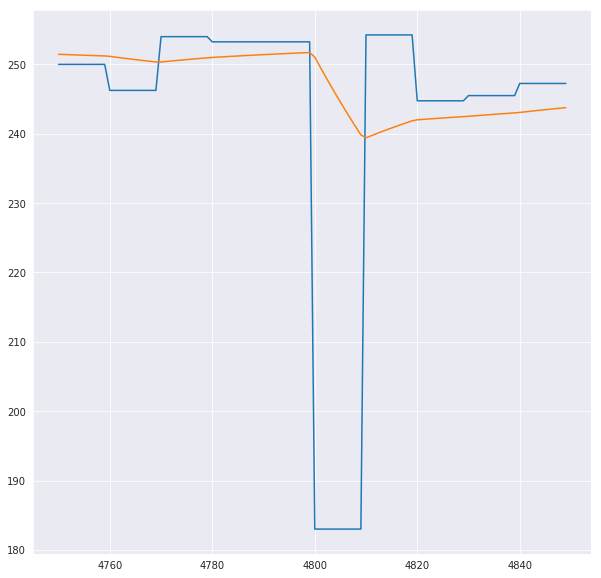

In [22]:
# Plotting the results
plt.plot(df.EVBOV_Max[4750:4850])
plt.plot(df.RC_Logic[4750:4850])
plt.show()

In [23]:
yhat = rc_logic(data["EVSMA_MAX"])

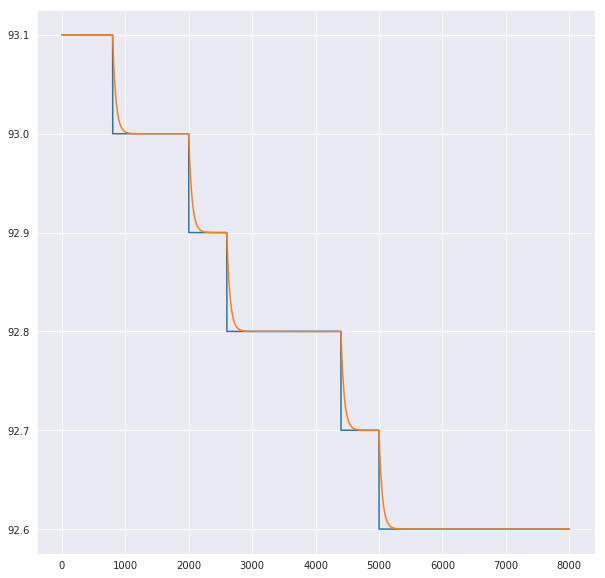

In [24]:
plt.plot(data["EVSMA_MAX"][22000:30000].values)
plt.plot(yhat[22000:30000])
plt.show()

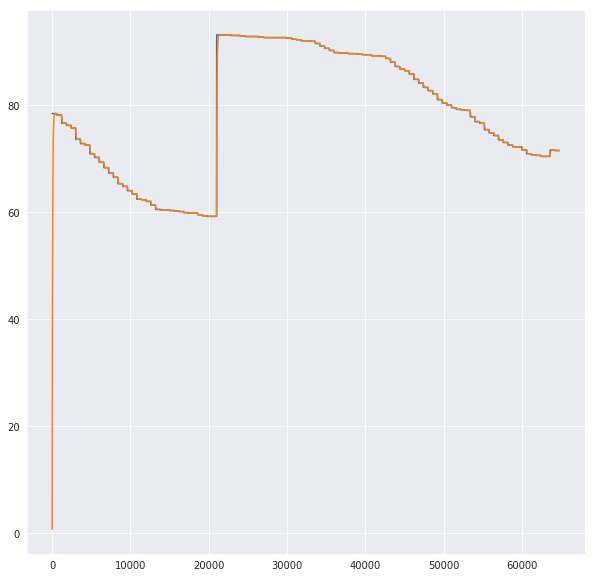

In [25]:
plt.plot(data["EVSMA_MAX"].values)
plt.plot(yhat)
plt.show()

In [38]:
from scipy.signal import savgol_filter

In [52]:
smooth_signal = savgol_filter(data["EVSMA_MAX"].values, 21, 7)

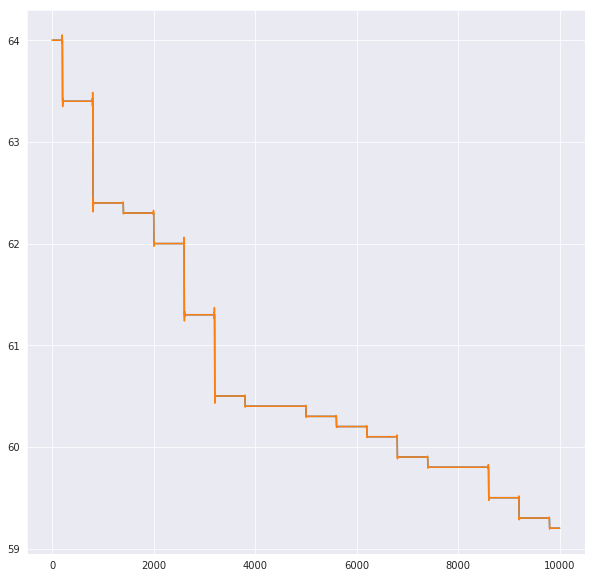

In [53]:
plt.plot(data["EVSMA_MAX"][10000:20000].values)
plt.plot(smooth_signal[10000:20000])
plt.show()

## Exponential Moving Averages

In [ ]:
name = 'closing'
series = pd.Series([1, 2, 3, 5, 8, 13, 21, 34], name=name).to_frame()
period = 4
alpha = 2/(1+period)

series[name+'_ewma'] = np.nan
series.loc[0, name+'_ewma'] = series[name].iloc[0]

series[name+'_ewma_adjust'] = np.nan
series.loc[0, name+'_ewma_adjust'] = series[name].iloc[0]

for i in range(1, len(series)):
    series.loc[i, name+'_ewma'] = (1-alpha) * series.loc[i-1, name+'_ewma'] + alpha * series.loc[i, name]

    ajusted_weights = np.array([(1-alpha)**(i-t) for t in range(i+1)])
    series.loc[i, name+'_ewma_adjust'] = np.sum(series.iloc[0:i+1][name].values * ajusted_weights) / ajusted_weights.sum()

print(series)
print("diff adjusted=False -> ", np.sum(series[name+'_ewma'] - series[name].ewm(span=period, adjust=False).mean()))
print("diff adjusted=True -> ", np.sum(series[name+'_ewma_adjust'] - series[name].ewm(span=period, adjust=True).mean()))